In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [5]:
words = open("names.txt","r").read().split("\n")
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [6]:
len(words)

32033

In [27]:
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(stoi,itos)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0} {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [28]:
block_size = 3

In [95]:
X = []
Y = []
for w in words:
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [96]:
C = torch.rand((27,2))
C

tensor([[0.3961, 0.3092],
        [0.2909, 0.1431],
        [0.7032, 0.0690],
        [0.1394, 0.0298],
        [0.5875, 0.7569],
        [0.7241, 0.2285],
        [0.9100, 0.7019],
        [0.2014, 0.6072],
        [0.8794, 0.5778],
        [0.1492, 0.6754],
        [0.1633, 0.1531],
        [0.0139, 0.1703],
        [0.0535, 0.9463],
        [0.0316, 0.8797],
        [0.0236, 0.8993],
        [0.0341, 0.0503],
        [0.6061, 0.0442],
        [0.6462, 0.9850],
        [0.8246, 0.7923],
        [0.0601, 0.7396],
        [0.9340, 0.3254],
        [0.2444, 0.3302],
        [0.6703, 0.5913],
        [0.3076, 0.1481],
        [0.6263, 0.8251],
        [0.7446, 0.1231],
        [0.4203, 0.3164]])

In [97]:
emb = C[X]

In [98]:
w1 = torch.rand(6,100)
b1 = torch.rand(100)

In [99]:
h = torch.tanh(emb.view(emb.shape[0],6) @ w1 + b1)
h.shape

torch.Size([228146, 100])

In [100]:
w2 = torch.rand(100,27)
b2 = torch.rand(27)

In [101]:
logits = h @ w2 + b2

In [102]:
counts = logits.exp()
probs = counts / counts.sum(-1, keepdim=True)

In [103]:
probs

tensor([[2.8287e-01, 1.4528e-03, 2.8801e-02,  ..., 6.1212e-04, 3.3953e-04,
         3.8653e-02],
        [2.5659e-01, 1.2499e-03, 3.3690e-02,  ..., 5.2514e-04, 3.6927e-04,
         3.7092e-02],
        [3.3345e-01, 1.4585e-03, 1.8861e-02,  ..., 5.4358e-04, 2.0020e-04,
         3.6255e-02],
        ...,
        [2.5311e-01, 1.2498e-03, 3.3994e-02,  ..., 5.2149e-04, 3.8649e-04,
         3.6670e-02],
        [2.9807e-01, 1.4080e-03, 2.3192e-02,  ..., 5.2514e-04, 2.8168e-04,
         3.4879e-02],
        [2.9239e-01, 1.2742e-03, 2.8659e-02,  ..., 4.4083e-04, 2.8972e-04,
         3.5380e-02]])

In [104]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [105]:
-probs[torch.arange(len(Y)), Y].log().mean()

tensor(5.0755)

In [106]:
F.cross_entropy(logits, Y)

tensor(5.0755)

In [107]:
parameters = [C,w1,b1,w2,b2]

In [108]:
for _ in parameters:
    _.requires_grad = True

In [109]:
epochs = 1000

In [110]:
# Forward Pass

In [114]:
for i in range(epochs):
    emb = C[X]
    h = torch.tanh(emb.view(emb.shape[0],6) @ w1 + b1)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, Y)
    print(f'{loss.item()}, epoch {i}')
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data -= p.grad.data * 0.1

2.467219114303589, epoch 0
2.4671213626861572, epoch 1
2.4670233726501465, epoch 2
2.466926097869873, epoch 3
2.4668285846710205, epoch 4
2.466731309890747, epoch 5
2.4666340351104736, epoch 6
2.4665369987487793, epoch 7
2.466439962387085, epoch 8
2.466343402862549, epoch 9
2.4662466049194336, epoch 10
2.4661502838134766, epoch 11
2.4660537242889404, epoch 12
2.4659578800201416, epoch 13
2.4658617973327637, epoch 14
2.465766191482544, epoch 15
2.465670347213745, epoch 16
2.4655745029449463, epoch 17
2.4654791355133057, epoch 18
2.465383768081665, epoch 19
2.4652886390686035, epoch 20
2.465193510055542, epoch 21
2.4650988578796387, epoch 22
2.4650039672851562, epoch 23
2.464909315109253, epoch 24
2.4648146629333496, epoch 25
2.4647204875946045, epoch 26
2.4646265506744385, epoch 27
2.4645326137542725, epoch 28
2.4644384384155273, epoch 29
2.4643449783325195, epoch 30
2.4642515182495117, epoch 31
2.464157819747925, epoch 32
2.464064359664917, epoch 33
2.4639713764190674, epoch 34
2.46387

KeyboardInterrupt: 

In [94]:
logits.max(1)

torch.return_types.max(
values=tensor([ 19.3872, -17.5421,  -1.2561,  17.2990,  68.0657,  19.3872,  27.8520,
         49.0284,  45.6149,  55.6344,  44.1193,  58.2792,  19.3872,  47.7896,
         54.1414,  67.7083,  19.3872,  28.3287,  11.3938,  31.2430,  38.2561,
         28.5088,  16.0953,  29.3193,  69.4313,  19.3872,  -2.2570,  12.2899,
         -0.4252,  45.9638,  43.4283,  65.5968], grad_fn=<MaxBackward0>),
indices=tensor([ 9, 13, 13,  1,  0,  9, 12,  9, 22,  9,  1,  0,  9, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0,  9, 15, 16,  8,  9,  1,  0]))

In [187]:
# Consolidate into a function
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [201]:
C = torch.rand((27,10))
w1 = torch.rand(30,300)
b1 = torch.rand(300)
w2 = torch.rand(300,27)
b2 = torch.rand(27)
parameters = [C,w1,b1,w2,b2]

In [202]:
for p in parameters:
    p.requires_grad = True

In [203]:
sum(p.nelement() for p in parameters)

17697

In [204]:
lre = torch.linspace(-3,0,1000)
lre = lre.exp()
lre

tensor([0.0498, 0.0499, 0.0501, 0.0502, 0.0504, 0.0505, 0.0507, 0.0508, 0.0510,
        0.0512, 0.0513, 0.0515, 0.0516, 0.0518, 0.0519, 0.0521, 0.0522, 0.0524,
        0.0526, 0.0527, 0.0529, 0.0530, 0.0532, 0.0533, 0.0535, 0.0537, 0.0538,
        0.0540, 0.0542, 0.0543, 0.0545, 0.0546, 0.0548, 0.0550, 0.0551, 0.0553,
        0.0555, 0.0556, 0.0558, 0.0560, 0.0561, 0.0563, 0.0565, 0.0566, 0.0568,
        0.0570, 0.0572, 0.0573, 0.0575, 0.0577, 0.0579, 0.0580, 0.0582, 0.0584,
        0.0586, 0.0587, 0.0589, 0.0591, 0.0593, 0.0594, 0.0596, 0.0598, 0.0600,
        0.0602, 0.0603, 0.0605, 0.0607, 0.0609, 0.0611, 0.0612, 0.0614, 0.0616,
        0.0618, 0.0620, 0.0622, 0.0624, 0.0626, 0.0627, 0.0629, 0.0631, 0.0633,
        0.0635, 0.0637, 0.0639, 0.0641, 0.0643, 0.0645, 0.0647, 0.0648, 0.0650,
        0.0652, 0.0654, 0.0656, 0.0658, 0.0660, 0.0662, 0.0664, 0.0666, 0.0668,
        0.0670, 0.0672, 0.0674, 0.0676, 0.0678, 0.0680, 0.0682, 0.0684, 0.0687,
        0.0689, 0.0691, 0.0693, 0.0695, 

In [210]:
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(30000):
    mask = torch.randint(0,X.shape[0],(100,))
    emb = C[X[mask]]
    h = torch.tanh(emb.view(emb.shape[0],30) @ w1 + b1)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, Y[mask])
    #print(f'{loss.item()}, epoch {i}')
    for p in parameters:
        p.grad = None
    loss.backward()
    # lr = lre[i]
    for p in parameters:
        p.data -= p.grad.data * 0.1
        
    stepi.append(i)
    lossi.append(loss.log10().item())

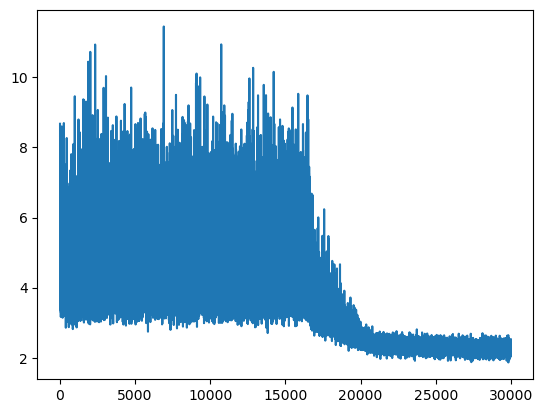

In [206]:
plt.plot(stepi,lossi)

In [207]:
C

tensor([[-0.1169,  0.1014,  0.3813, -0.3924,  0.1913, -0.0997,  0.2996, -0.0704,
         -0.2194, -0.3913],
        [ 0.1347, -0.7130, -0.3011, -0.1298,  0.7435,  0.2655,  0.1626, -0.3791,
         -0.3493,  0.1259],
        [-0.3289,  0.4859,  0.3679,  0.5988,  0.5014,  0.2958, -0.3890,  0.0131,
          0.1327, -0.1033],
        [-0.5967,  0.5441, -0.5351, -0.0403, -0.0645,  0.3133,  0.4968,  0.3542,
         -0.0092,  0.5965],
        [-0.2088,  0.1250, -0.1205,  0.4182,  0.4028, -0.0791, -0.2902,  0.0685,
          0.1974,  0.0715],
        [ 0.1200,  0.2222, -0.7586,  0.2005,  0.1498,  0.4202,  0.1677, -0.7254,
         -0.5503,  0.3268],
        [-0.0383,  0.6058,  0.3392, -0.0469, -0.0035,  0.0798,  0.2568,  0.1999,
          0.6039,  0.0989],
        [-0.0536,  0.4089, -0.0324,  0.1312,  0.4662,  0.4270,  0.0926,  0.5761,
          0.1576, -0.4646],
        [ 0.2241, -0.1318,  0.1419, -0.0285,  0.1614, -0.4021, -0.2361, -0.3679,
          0.6842,  0.1817],
        [ 0.2732, -

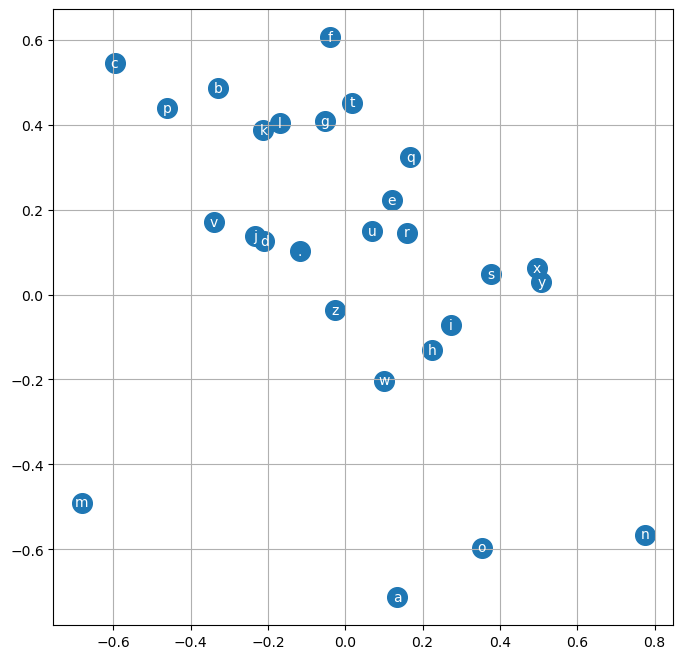

In [208]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')